In [1]:
#!/usr/bin/env python3
import numpy as np
import matplotlib.pyplot as plt
import mplhep as hep            # for plotting style

plt.style.use(hep.style.ROOT)

# Data Generation

In [2]:
n_events  = 50000                       # total number of events
frac_fake = 0.4                         # fraction of events corresponding to fake-lepton events
n_fakes   = int(n_events * frac_fake)   # number of events corresponding to fake-lepton events
n_real    = n_events - n_fakes          # number of events corresponding to real-lepton events

In [3]:
np.random.seed(42)  # for reproduction

In [4]:
# Real-lepton distributions

real_pt = np.random.lognormal(mean=3.4, sigma=0.4, size=n_real)

real_iso = np.random.normal(loc=0.03, scale=0.015, size=n_real)          
real_iso = np.clip(real_iso, 0, 1)

real_met = np.random.lognormal(mean=3.3, sigma=0.4, size=n_real)

real_weights = np.random.normal(loc=1.0, scale=0.2, size=n_real)
real_weights = np.clip(real_weights, 0.01, None)

In [5]:
# Fake-lepton distributions

fake_pt = np.random.lognormal(mean=3.2, sigma=0.5, size=n_fakes)

fake_iso = np.random.normal(loc=0.12, scale=0.06, size=n_fakes)          
fake_iso = np.clip(fake_iso, 0, 1)

fake_met = np.random.lognormal(mean=2.8, sigma=0.5, size=n_fakes)

fake_weights = np.random.gamma(shape=2.0, scale=0.5, size=n_fakes)

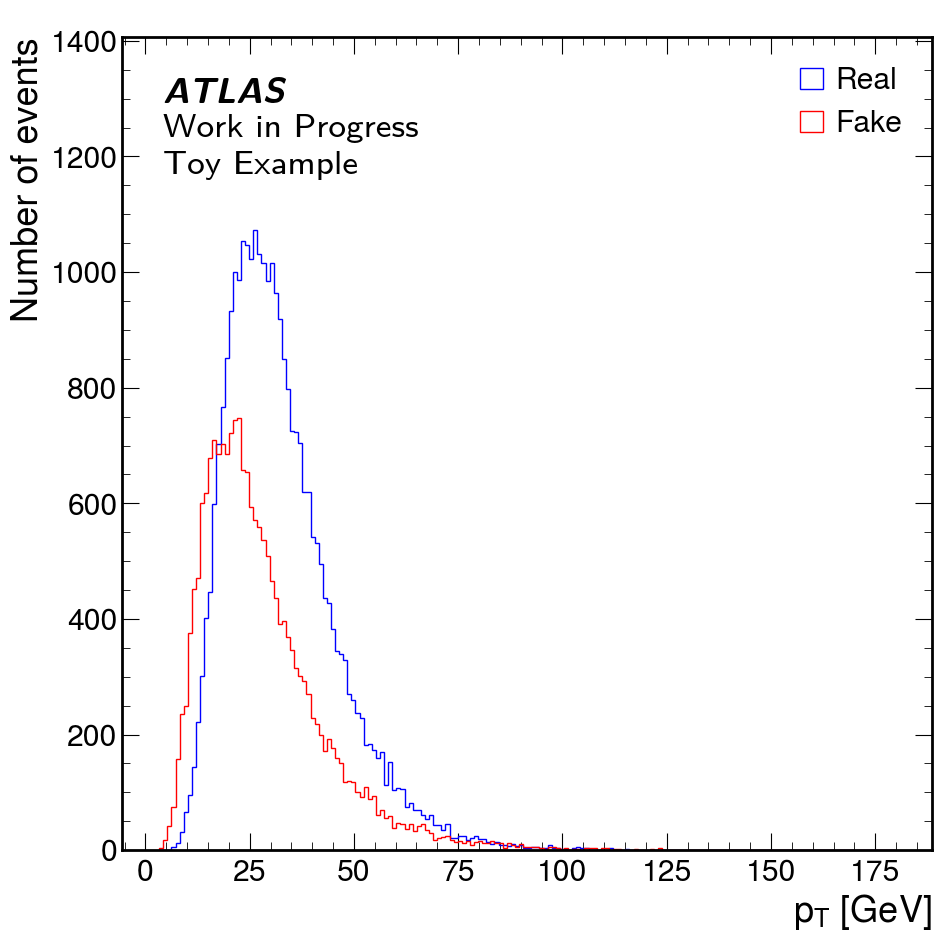

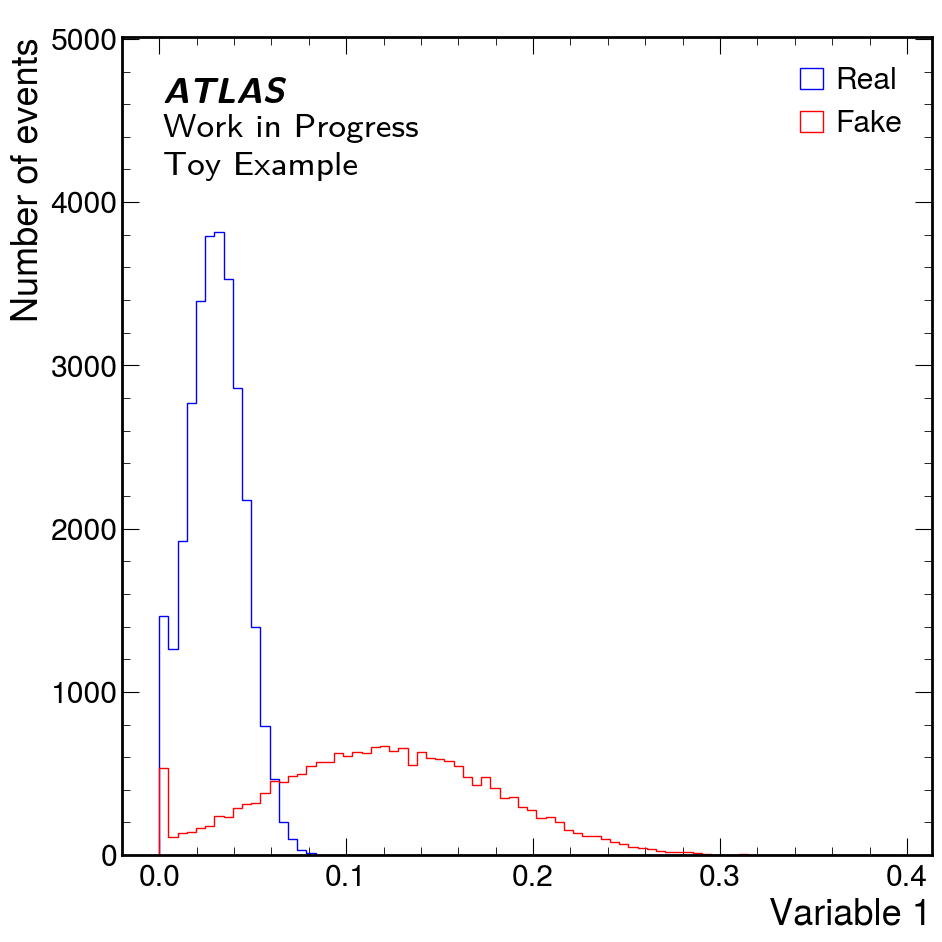

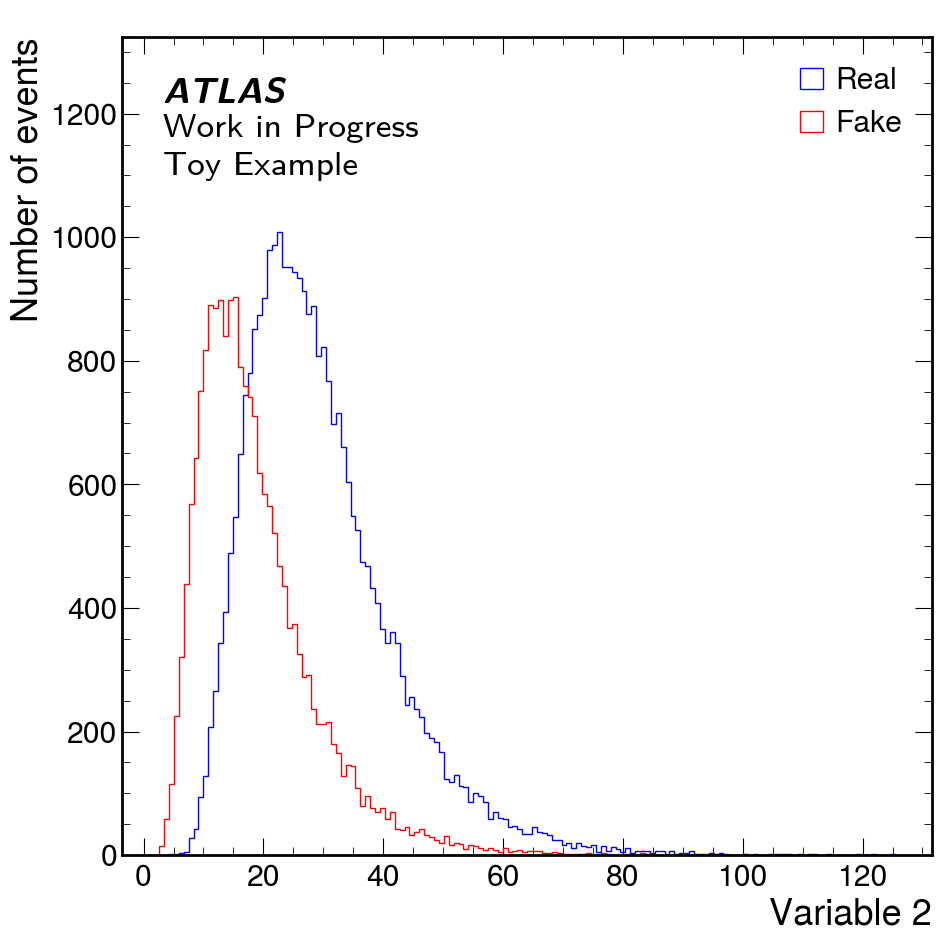

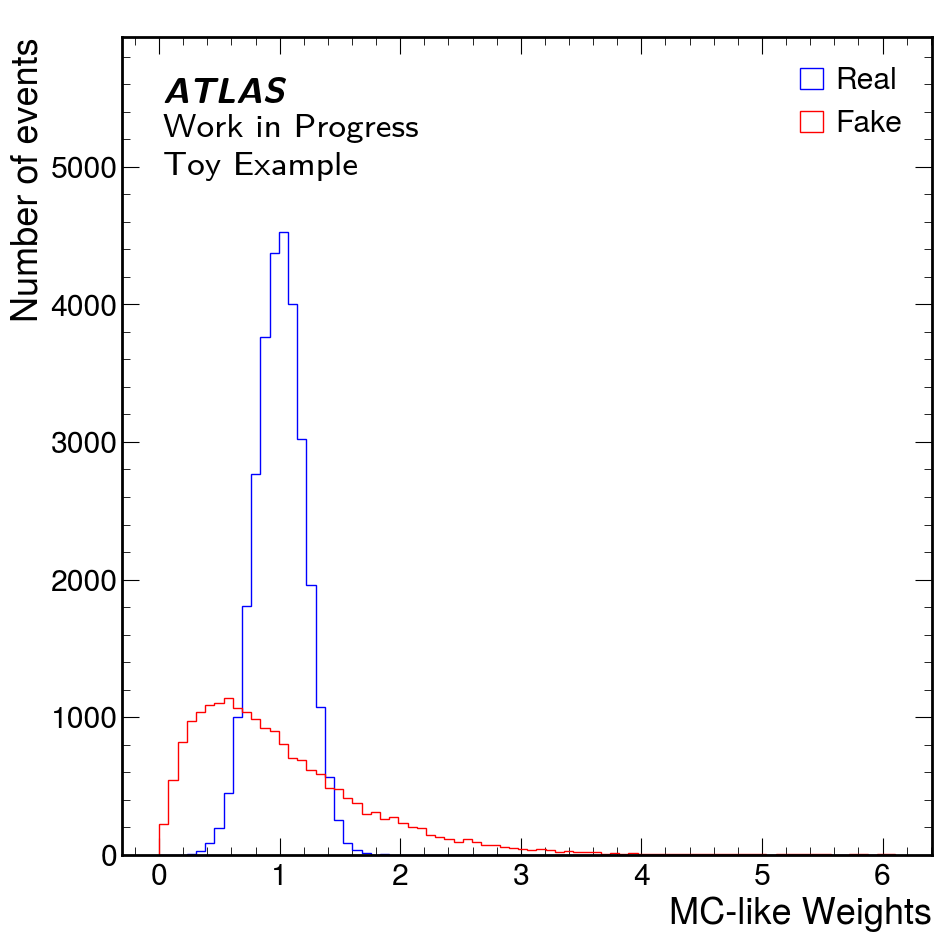

In [6]:
# Plot Distributions

def plotter (var, unit, real_dist, fake_dist, bin_number, xscale, yscale= "linear"):
    min_bin = min(np.min(real_dist), np.min(fake_dist))
    max_bin = max(np.max(real_dist), np.max(fake_dist))
    fig, ax = plt.subplots()
    if xscale == "log":
        ax.hist(real_dist, bins = np.logspace(np.log10(min_bin), np.log10(max_bin), bin_number), histtype= "step", color= "blue", label=r"Real")
        ax.hist(fake_dist, bins = np.logspace(np.log10(min_bin), np.log10(max_bin), bin_number), histtype= "step", color=  "red", label=r"Fake")
        ax.set_xscale("log")
    else:
        ax.hist(real_dist, bins = bin_number, range = (min_bin, max_bin), histtype= "step", color= "blue", label=r"Real")
        ax.hist(fake_dist, bins = bin_number, range = (min_bin, max_bin), histtype= "step", color=  "red", label=r"Fake")
        ax.set_yscale(yscale)
    ax.set_xlabel(var + unit)
    ax.set_ylabel("Number of events")
    if yscale == "log":
        mergin = 10
    else:
        mergin = 1.25
    bottom, top = ax.get_ylim()
    ax.set_ylim(top=top * mergin)
    ax.legend(fancybox=False, facecolor="white", loc="upper right", handlelength=0.75, handletextpad=0.4)
    hep.atlas.label(loc=2, ax=ax, data=True, label="Work in Progress\n", rlabel=" ", fontname="Latin Modern sans", fontsize=20)
    ax.text(0.05, 0.86, "Toy Example", transform=ax.transAxes, fontsize=24, fontname="Latin Modern Sans", ha="left", va="top")
    fig.tight_layout()
    plt.show()

plotter(r"$p_{\mathrm{T}}$", " [GeV]", real_pt, fake_pt, 180, "")
plotter("Variable 1", "", real_iso, fake_iso, 80, "")
plotter("Variable 2", "", real_met, fake_met, 150, "")
plotter("MC-like Weights", "", real_weights, fake_weights, 80, "")

In [7]:
# Overal Distribution

lep_pt  = np.concatenate([real_pt, fake_pt])
lep_iso = np.concatenate([real_iso, fake_iso])
met_et  = np.concatenate([real_met, fake_met])
weights = np.concatenate([real_weights, fake_weights])
is_real = np.concatenate([np.ones(n_real, dtype=int), np.zeros(n_fakes, dtype=int)]) # is_real = 1 => real, 0 => fake

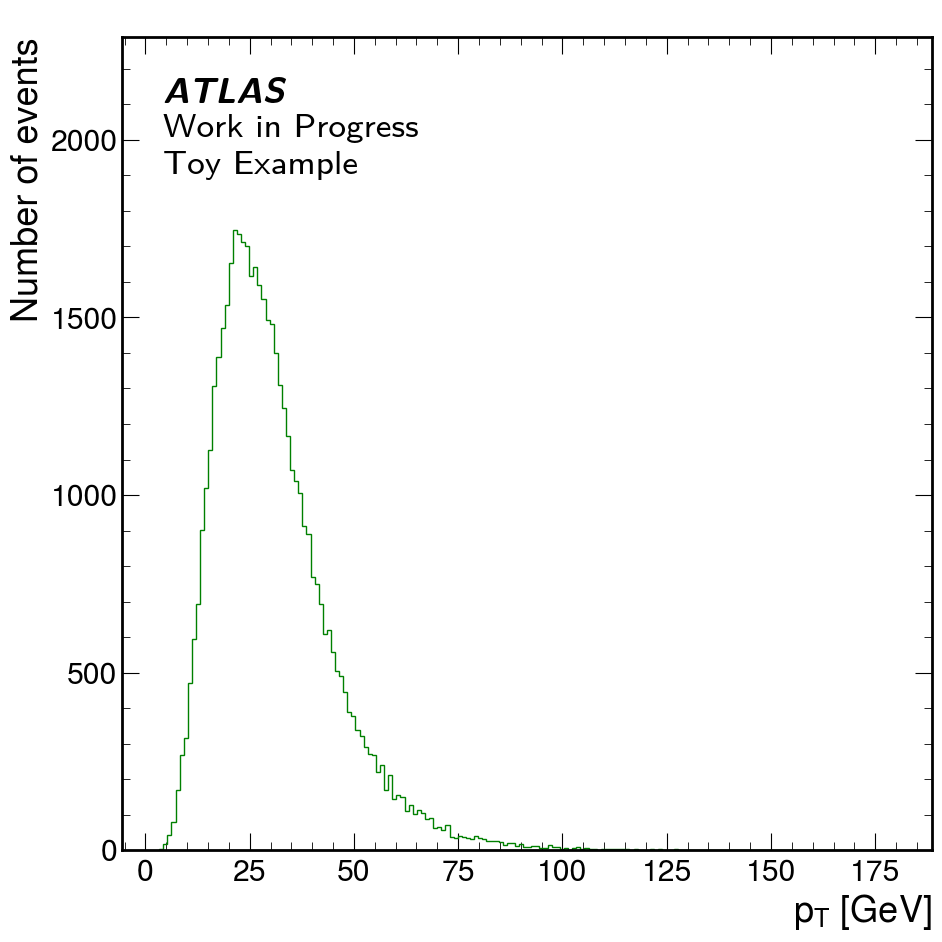

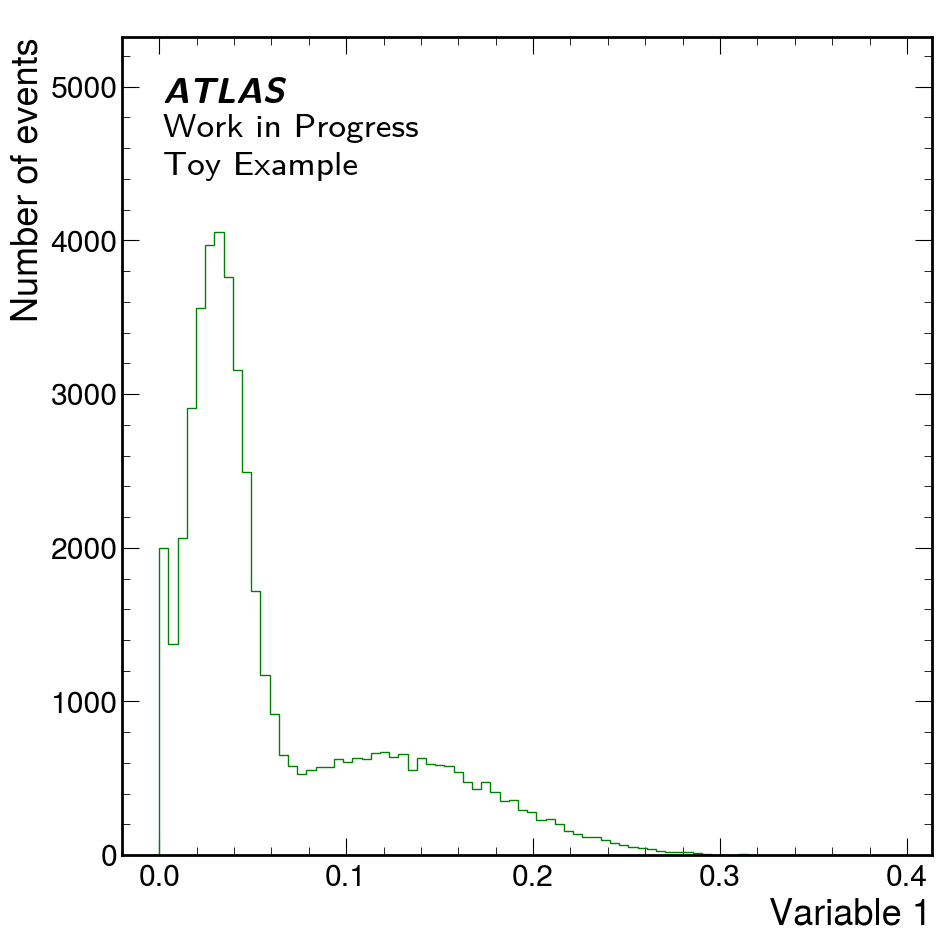

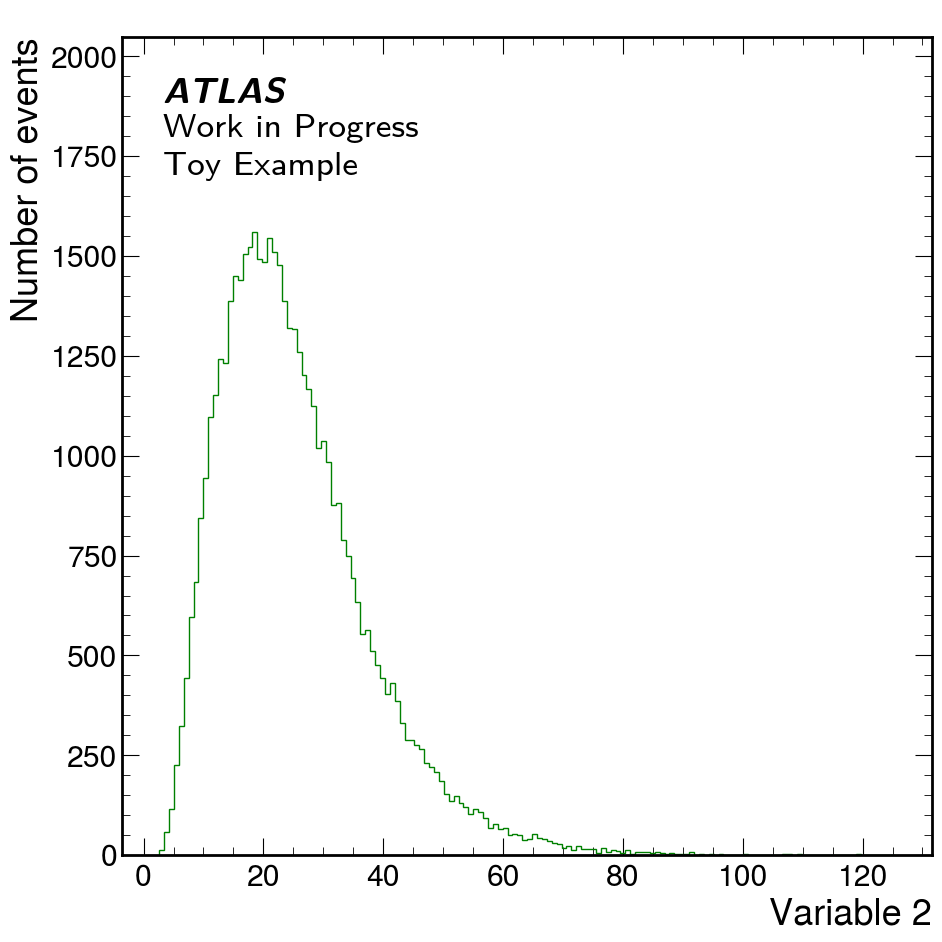

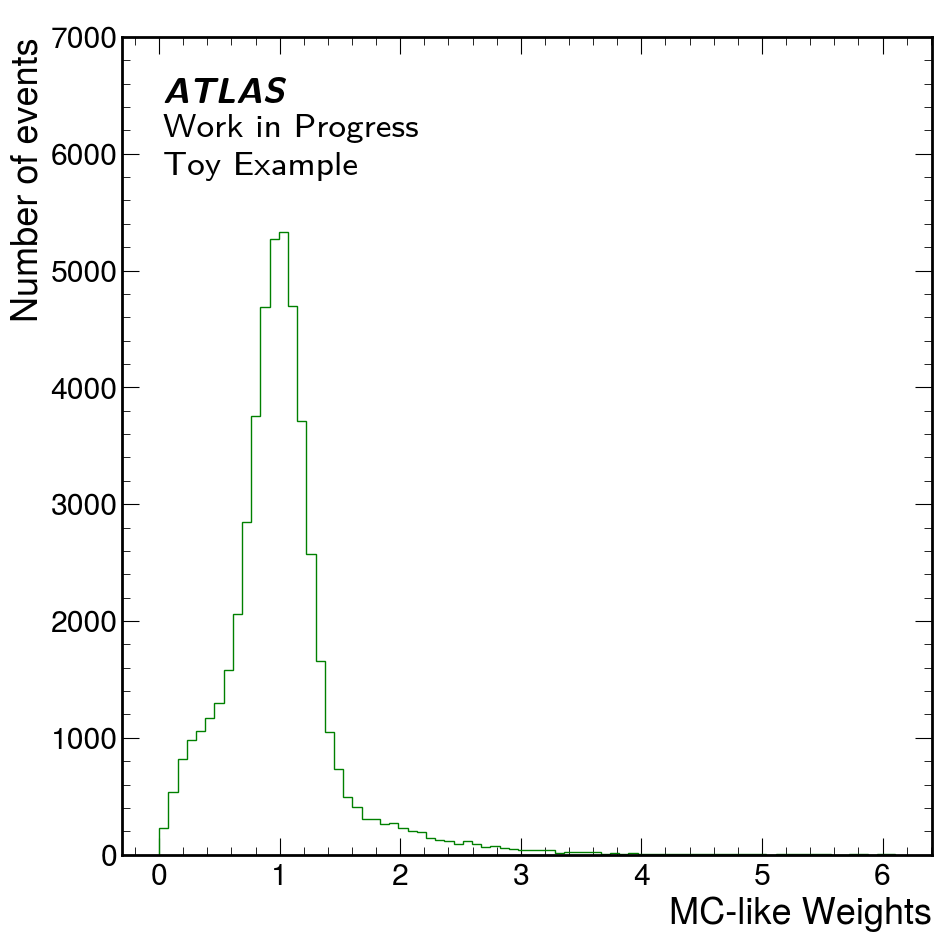

In [8]:
# Plot Distributions

def plotter (var, unit, dist, bin_number, xscale, yscale= "linear"):
    fig, ax = plt.subplots()
    if xscale == "log":
        ax.hist(dist, bins = np.logspace(np.log10(np.min(dist)), np.log10(np.max(dist)), bin_number), histtype= "step", color= "green")
        ax.xscale("log")
    else:
        ax.hist(dist, bins = bin_number, range = (np.min(dist), np.max(dist)), histtype= "step", color= "green")
    ax.set_xlabel(var + unit)
    ax.set_ylabel("Number of events")
    if yscale == "log":
        mergin = 10
    else:
        mergin = 1.25
    bottom, top = ax.get_ylim()
    ax.set_ylim(top=top * mergin)
    hep.atlas.label(loc=2, ax=ax, data=True, label="Work in Progress\n", rlabel=" ", fontname="Latin Modern sans", fontsize=20)
    ax.text(0.05, 0.86, "Toy Example", transform=ax.transAxes, fontsize=24, fontname="Latin Modern Sans", ha="left", va="top")
    fig.tight_layout()
    plt.show()

plotter(r"$p_{\mathrm{T}}$", " [GeV]", lep_pt, 180, "")
plotter("Variable 1", "", lep_iso, 80, "")
plotter("Variable 2", "", met_et, 150, "")
plotter("MC-like Weights", "", weights, 80, "")

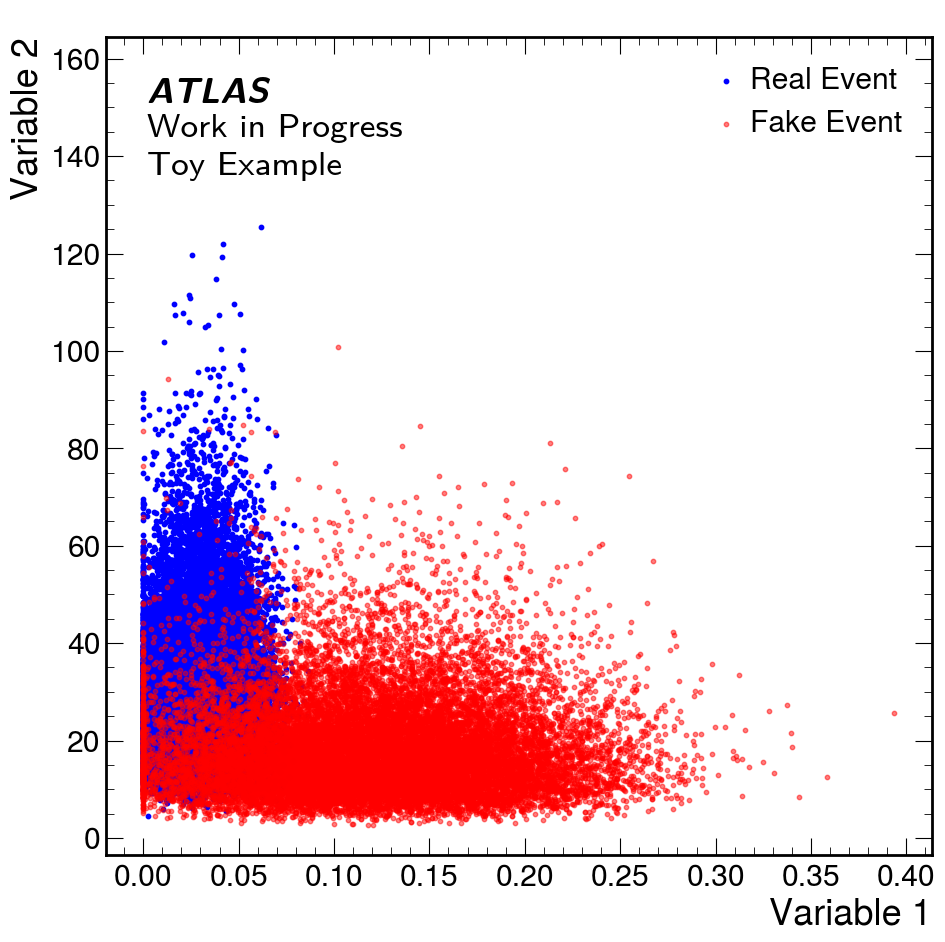

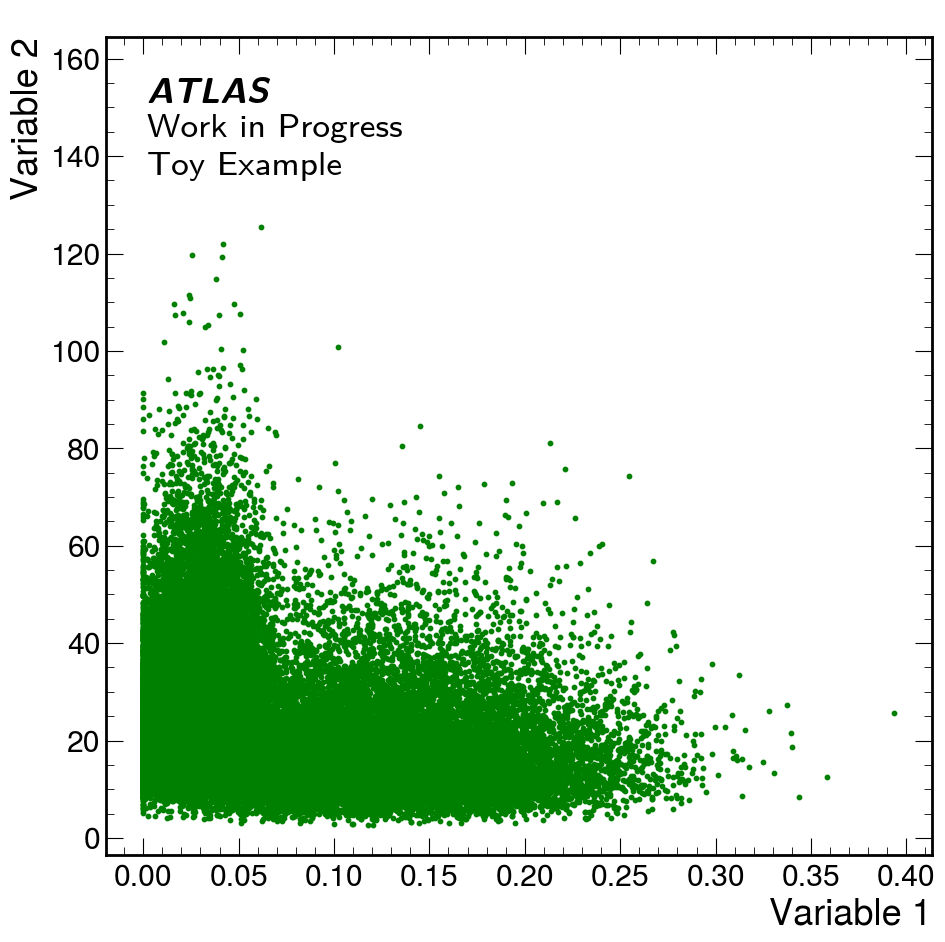

In [9]:
# Scatter Plots

fig, ax = plt.subplots()
ax.scatter(lep_iso[is_real == 1], met_et[is_real == 1], alpha=1.0, color= "blue", label="Real Event", s=10)
ax.scatter(lep_iso[is_real == 0], met_et[is_real == 0], alpha=0.5, color=  "red", label="Fake Event", s=10)
ax.set_xlabel("Variable 1")
ax.set_ylabel("Variable 2")
bottom, top = ax.get_ylim()
ax.set_ylim(top=top * 1.25)
ax.legend(fancybox=False, facecolor="white", loc="upper right", handlelength=0.75, handletextpad=0.4)
hep.atlas.label(loc=2, ax=ax, data=True, label="Work in Progress\n", rlabel=" ", fontname="Latin Modern sans", fontsize=20)
ax.text(0.05, 0.86, "Toy Example", transform=ax.transAxes, fontsize=24, fontname="Latin Modern Sans", ha="left", va="top")
fig.tight_layout()
plt.show()

fig, ax = plt.subplots()
ax.scatter(lep_iso, met_et, color= "green", s=10)
ax.set_xlabel("Variable 1")
ax.set_ylabel("Variable 2")
bottom, top = ax.get_ylim()
ax.set_ylim(top=top * 1.25)
hep.atlas.label(loc=2, ax=ax, data=True, label="Work in Progress\n", rlabel=" ", fontname="Latin Modern sans", fontsize=20)
ax.text(0.05, 0.86, "Toy Example", transform=ax.transAxes, fontsize=24, fontname="Latin Modern Sans", ha="left", va="top")
fig.tight_layout()
plt.show()


# Fake Factor Estimation

In [10]:
# Cuts

met_cut       = 20
iso_cut_loose = 0.1
iso_cut_tight = 0.05

In [11]:
# Step 1: define four regions (region A = signal region, region B = background control region, region C = tight Fake Factor control region, region D = loose Fake Factor control region)

def lep_region_def(lep_iso, met_et, met_cut, iso_cut_tight, iso_cut_loose):
    region_A = (met_et >  met_cut) & (lep_iso <  iso_cut_tight)
    region_B = (met_et >  met_cut) & (lep_iso >= iso_cut_tight) & (lep_iso <  iso_cut_loose)
    region_C = (met_et <= met_cut) & (lep_iso <  iso_cut_tight)
    region_D = (met_et <= met_cut) & (lep_iso >= iso_cut_tight) & (lep_iso <  iso_cut_loose)
    regions  = [region_A, region_B, region_C, region_D]
    return regions

In [12]:
# Step 2: count the number of events in each region

def lep_region_counts(weights, regions):
    counts = []
    for region in regions:
        N = np.sum(weights[region])
        counts.append(N)
    return counts

In [13]:
# Step 3: plot the four regions, check the density of each one (optional)

def regions_scatter_plot(lep_iso, met_et, regions, counts)->None:
    fig, ax = plt.subplots()
    ax.scatter(lep_iso[regions[0]], met_et[regions[0]], label=f"Region A = {round(counts[0])}", s=10, color= "blue")
    ax.scatter(lep_iso[regions[1]], met_et[regions[1]], label=f"Region B = {round(counts[1])}", s=10, color= "red")
    ax.scatter(lep_iso[regions[2]], met_et[regions[2]], label=f"Region C = {round(counts[2])}", s=10, color= "green")
    ax.scatter(lep_iso[regions[3]], met_et[regions[3]], label=f"Region D = {round(counts[3])}", s=10, color= "orange")
    ax.set_xlabel("Variable 1")
    ax.set_ylabel("Variable 2")
    bottom, top = ax.get_ylim()
    ax.set_ylim(top=top * 1.25)
    ax.legend(fancybox=False, facecolor="white", loc="upper right", handlelength=0.75, handletextpad=0.4)
    hep.atlas.label(loc=2, ax=ax, data=True, label="Work in Progress\n", rlabel=" ", fontname="Latin Modern sans", fontsize=20)
    ax.text(0.05, 0.86, "Toy Example", transform=ax.transAxes, fontsize=24, fontname="Latin Modern Sans", ha="left", va="top")
    fig.tight_layout()
    plt.show()

In [14]:
# Step 4: estimate the Fake Factor by dividing the fake events in the tight Fake Factor control region with the fake events in the loose Fake Factor control region

def fake_factor(lep_iso, met_et, weights, met_cut, iso_cut_tight, iso_cut_loose = 1)->None:
    regions = lep_region_def(lep_iso, met_et, met_cut, iso_cut_tight, iso_cut_loose)
    counts  = lep_region_counts(weights, regions)
    regions_scatter_plot(lep_iso, met_et, regions, counts)
    FF = counts[2]/counts[3]
    predicted_fakes_A = counts[1] * FF
    true_fakes_A = np.sum(weights[regions[0] & (is_real == 0)])
    ratio_A = predicted_fakes_A / true_fakes_A
    print(f"Fake Factor = {FF} \nPredicted Fakes in Region A = {round(predicted_fakes_A)} \nTrue Fakes in Region A = {round(true_fakes_A)} \nRatio (= Predicted/True) = {ratio_A}")

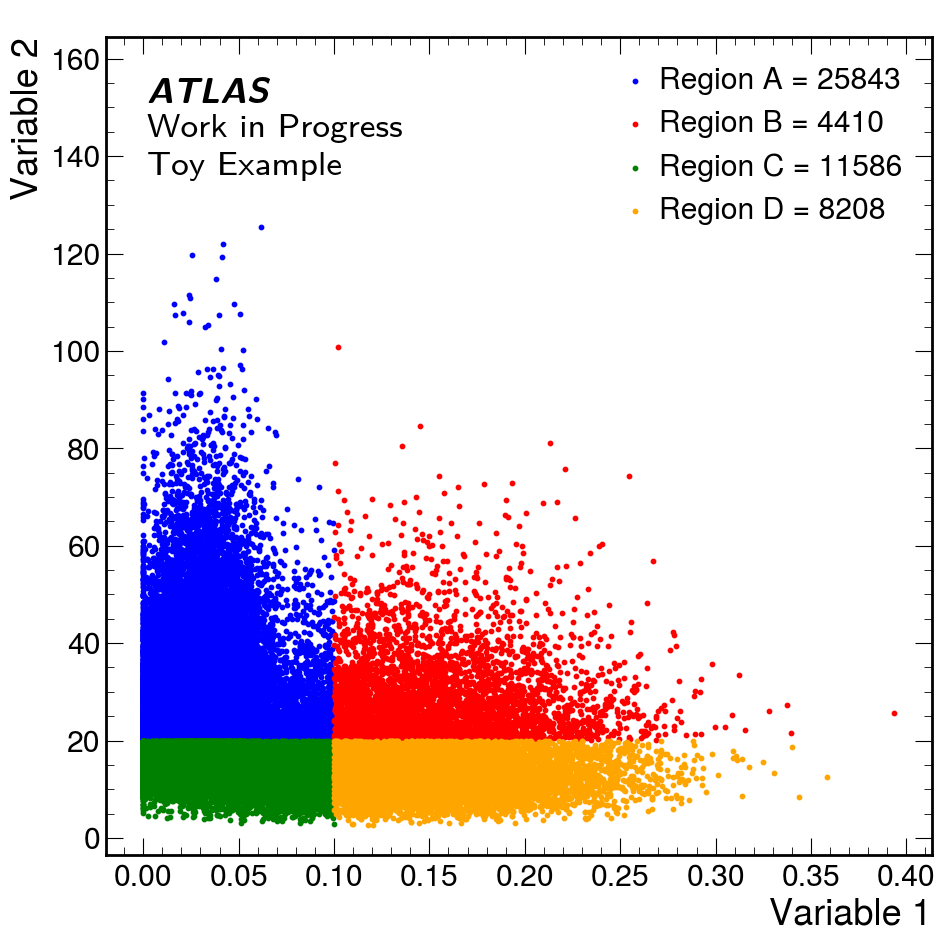

Fake Factor = 1.411657221631103 
Predicted Fakes in Region A = 6226 
True Fakes in Region A = 2508 
Ratio (= Predicted/True) = 2.482329601506748


In [15]:
# Example 1: Apply only the loose cut

fake_factor(lep_iso, met_et, weights, met_cut, iso_cut_loose)

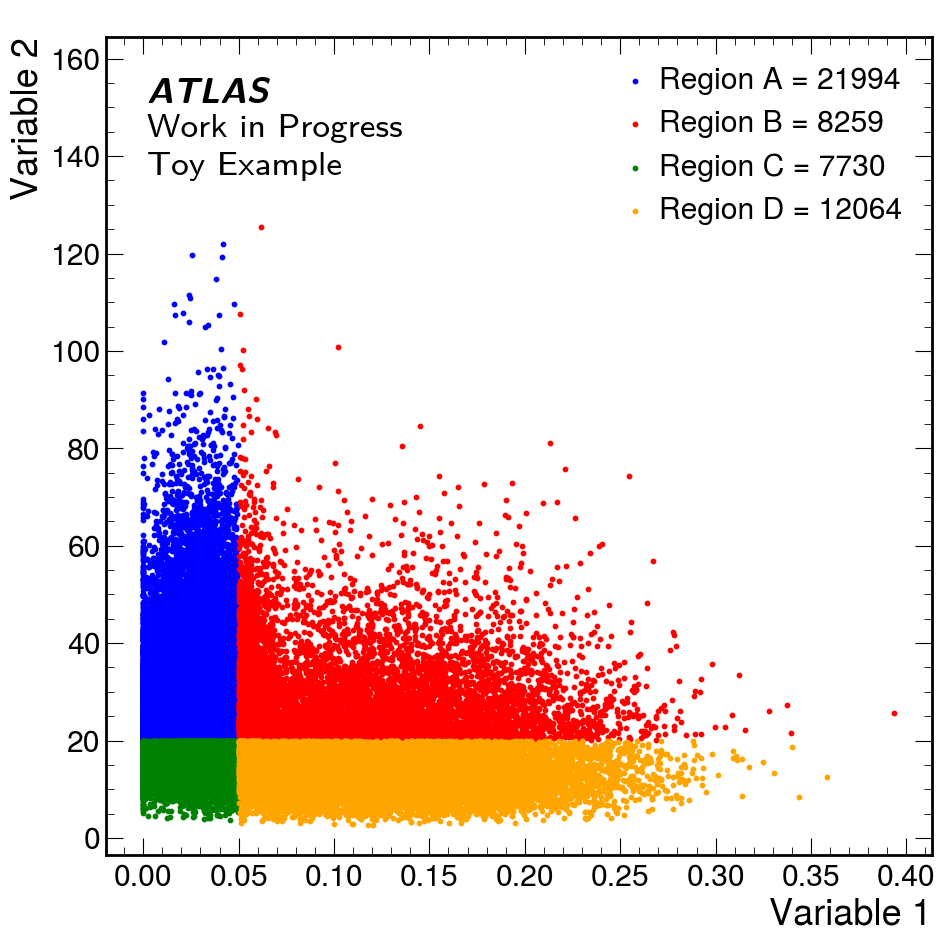

Fake Factor = 0.6407348945023482 
Predicted Fakes in Region A = 5292 
True Fakes in Region A = 794 
Ratio (= Predicted/True) = 6.663953875745695


In [16]:
# Example 2: Apply only the tight cut

fake_factor(lep_iso, met_et, weights, met_cut, iso_cut_tight)

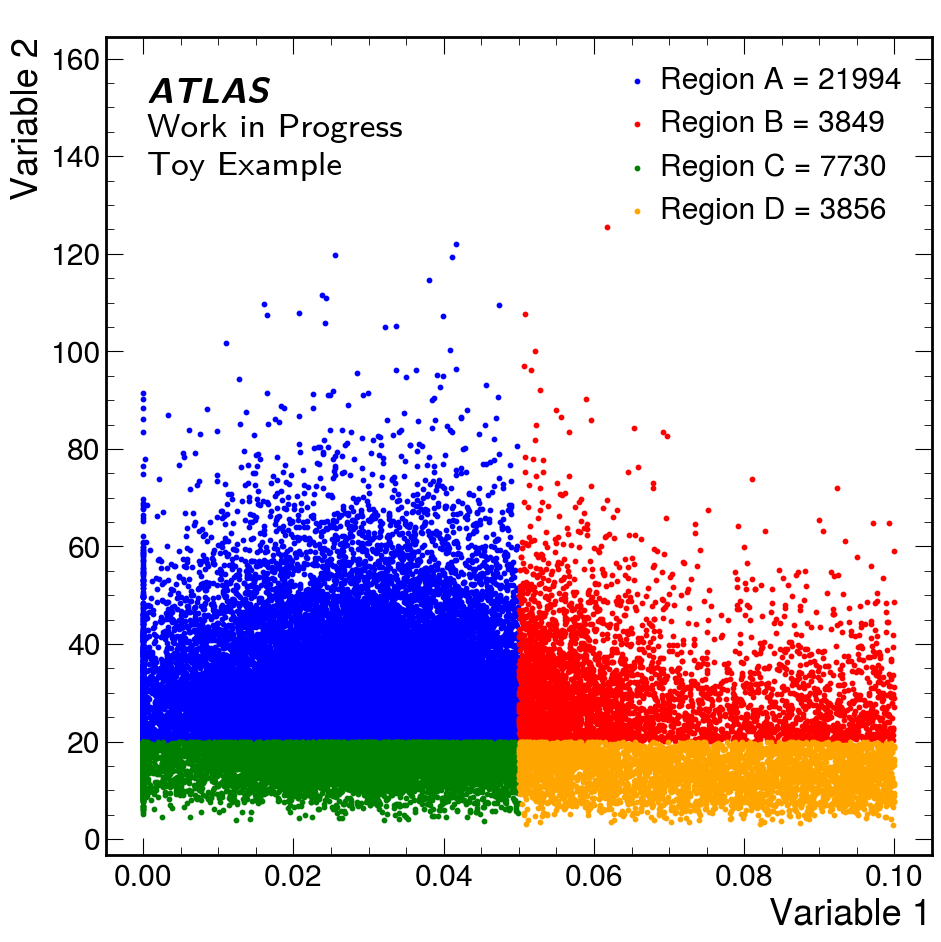

Fake Factor = 2.0043951006487792 
Predicted Fakes in Region A = 7715 
True Fakes in Region A = 794 
Ratio (= Predicted/True) = 9.714914738271514


In [17]:
# Example 3: Apply both the tight & the loose cut

fake_factor(lep_iso, met_et, weights, met_cut, iso_cut_tight, iso_cut_loose)

## Real-Lepton Event Contamination
Every region of phase space contains both real-lepton events and fake-lepton events. The Fake Factor is defined just for pure fake-lepton events. Therefore, any contamination by real-lepton events must be subtracted.

In [18]:
# Step 5: subtract Real-Lepton Event Contamination (RLEC) in the fake factor control regions

def rlec_subtraction(lep_iso, met_et, weights, met_cut, iso_cut_tight, iso_cut_loose = 1):
    regions = lep_region_def(lep_iso, met_et, met_cut, iso_cut_tight, iso_cut_loose)
    fake_counts = []
    for region in regions:
        true_fakes = np.sum(weights[region & (is_real == 0)])
        fake_counts.append(true_fakes)
    return fake_counts

In [19]:
# Step 6: re-evaluate the Fake Factor without RLEC (True Fake Factor)

def true_fake_factor(lep_iso, met_et, weights, met_cut, iso_cut_tight, iso_cut_loose = 1)->None:
    fake_counts = rlec_subtraction(lep_iso, met_et, weights, met_cut, iso_cut_tight, iso_cut_loose)
    FF = fake_counts[2]/fake_counts[3]
    predicted_fakes_A = fake_counts[1] * FF
    true_fakes_A = fake_counts[0]
    ratio_A = predicted_fakes_A / true_fakes_A
    print(f"Fake Factor = {FF} \nPredicted Fakes in Region A = {round(predicted_fakes_A)} \nTrue Fakes in Region A = {round(true_fakes_A)} \nRatio (= Predicted/True) = {ratio_A}")

In [20]:
# Example 1: Apply only the loose cut

true_fake_factor(lep_iso, met_et, weights, met_cut, iso_cut_loose)

Fake Factor = 0.5968569544195018 
Predicted Fakes in Region A = 2632 
True Fakes in Region A = 2508 
Ratio (= Predicted/True) = 1.0495435174473726


In [21]:
# Example 2: Apply only the tight cut

true_fake_factor(lep_iso, met_et, weights, met_cut, iso_cut_tight)

Fake Factor = 0.14077107721463059 
Predicted Fakes in Region A = 862 
True Fakes in Region A = 794 
Ratio (= Predicted/True) = 1.0856207420394974


In [22]:
# Example 3: Apply both the tight & the loose cut

true_fake_factor(lep_iso, met_et, weights, met_cut, iso_cut_tight, iso_cut_loose)

Fake Factor = 0.49287049844416164 
Predicted Fakes in Region A = 845 
True Fakes in Region A = 794 
Ratio (= Predicted/True) = 1.0637523867258991


# Fake Factor Dependence on $p_{\mathrm{T}}$

Until now, we cosdidered the simplest (and unrealistic) case where the Fake Factor is a constant (ABCD Method). In reality, the Fake Factor depends on certain lepton properties. 
Most importantly, the Fake Factor depends strongly on the lepton's $p_{\mathrm{T}}$. A weaker dependence of the Fake Factor on $\eta$ is also observed.
When the Fake Factor depends on some variables, we need to split the phase space into bins in which the Fake Factor can be considered constant.

In [23]:
# Error of a fraction

def frac_err(num, den):
    num_err = np.sqrt(num)
    den_err = np.sqrt(den)
    with np.errstate(divide="ignore", invalid="ignore"):
        err = np.sqrt((1.0 / den**2) * (num_err**2) + ((-num) / (den**2))**2 * (den_err**2))
        err = np.nan_to_num(err, nan=0.0, posinf=0.0, neginf=0.0)
    return err

In [24]:
# Estimation of the fake factor and the true fake factor for each pt bins

n_bins      = 18
pt_bins     = np.linspace(0, max(lep_pt), n_bins + 1)
bin_centers = ((pt_bins[:-1] + pt_bins[1:]) / 2)
fake_factors = []
fake_factor_errors = []
true_fake_factors = []
true_fake_factor_errors = []
for i in range(n_bins):
    pt_bin = (lep_pt > pt_bins[i]) & (lep_pt < pt_bins[i+1])
    regions = lep_region_def(lep_iso[pt_bin & (is_real == 0)], met_et[pt_bin & (is_real == 0)], met_cut, iso_cut_tight, iso_cut_loose)
    counts  = lep_region_counts(weights[pt_bin & (is_real == 0)], regions)
    with np.errstate(divide="ignore", invalid="ignore"):
        FF = counts[2]/counts[3]
        FF = np.nan_to_num(FF, nan=0.0, posinf=0.0, neginf=0.0)
    FF_error = frac_err(counts[2],counts[3])
    with np.errstate(divide="ignore", invalid="ignore"):
        FF_true = counts[0]/counts[1]
        FF_true = np.nan_to_num(FF, nan=0.0, posinf=0.0, neginf=0.0)
    FF_true_error = frac_err(counts[0],counts[1])
    fake_factors.append(FF)
    fake_factor_errors.append(FF_error)
    true_fake_factors.append(FF_true)
    true_fake_factor_errors.append(FF_true_error)
fake_factors = np.array(fake_factors)
fake_factor_errors = np.array(fake_factor_errors)
true_fake_factors = np.array(true_fake_factors)
true_fake_factor_errors = np.array(true_fake_factor_errors)

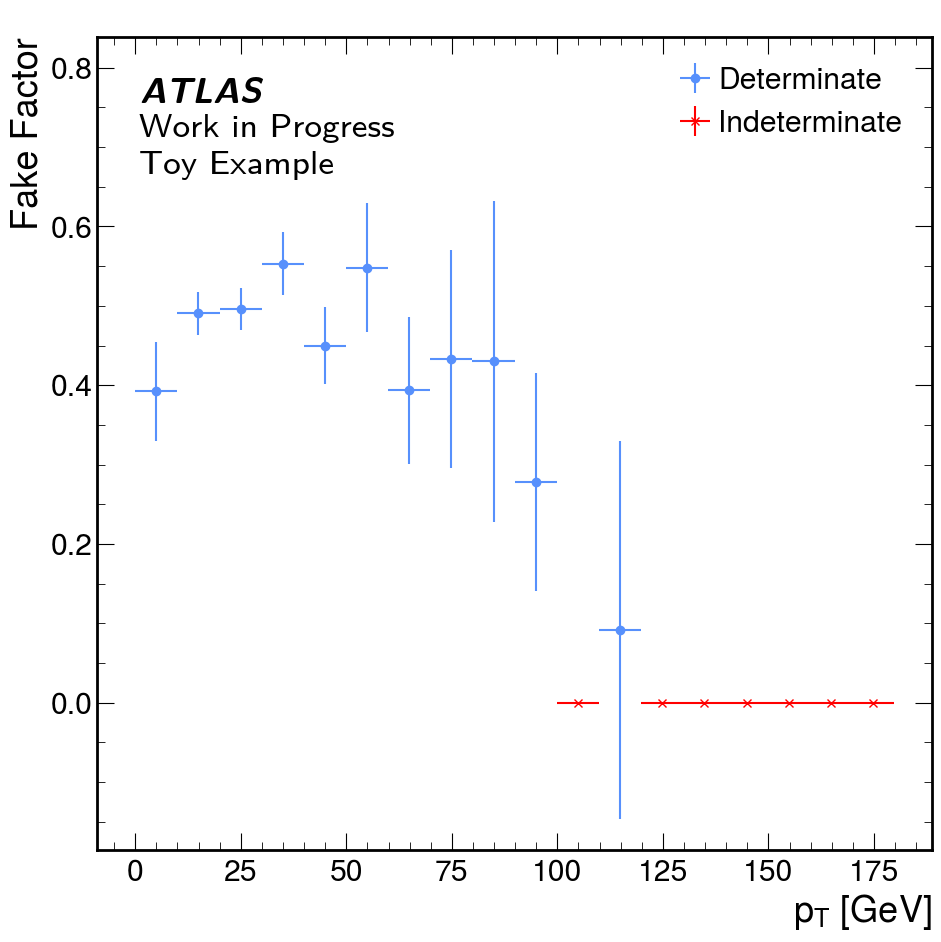

In [25]:
# Fake Factor as a function of pt

fig, ax = plt.subplots()
ax.errorbar(bin_centers[fake_factors != 0], fake_factors[fake_factors != 0], xerr=((pt_bins[1:] - pt_bins[:-1]) / 2.0)[fake_factors != 0], yerr=fake_factor_errors[fake_factors != 0], fmt="o", label="Determinate")
ax.errorbar(bin_centers[fake_factors == 0], fake_factors[fake_factors == 0], xerr=((pt_bins[1:] - pt_bins[:-1]) / 2.0)[fake_factors == 0], yerr=fake_factor_errors[fake_factors == 0], fmt="rx", label="Indeterminate")
ax.set_xlabel(r"$p_{\mathrm{T}}$ [GeV]")
ax.set_ylabel(r"Fake Factor")
bottom, top = ax.get_ylim()
ax.set_ylim(top=top * 1.25)
ax.legend(fancybox=False, facecolor="white", loc="upper right", handlelength=0.75, handletextpad=0.4)
hep.atlas.label(loc=2, ax=ax, data=True, label="Work in Progress\n", rlabel=" ", fontname="Latin Modern sans", fontsize=20)
ax.text(0.05, 0.86, "Toy Example", transform=ax.transAxes, fontsize=24, fontname="Latin Modern Sans", ha="left", va="top")
fig.tight_layout()
plt.show()

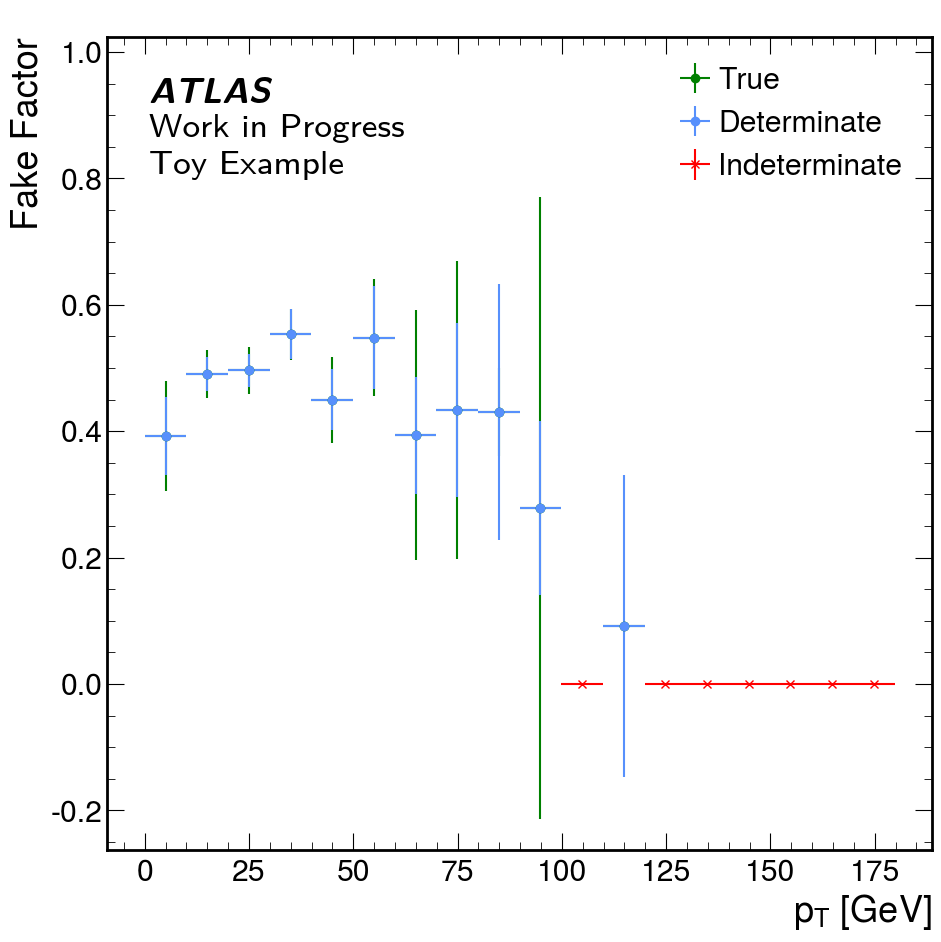

In [26]:
# Comparison between True and Estimated Fake Factors

fig, ax = plt.subplots()
ax.errorbar(bin_centers[true_fake_factors != 0], true_fake_factors[true_fake_factors != 0], xerr=((pt_bins[1:] - pt_bins[:-1]) / 2.0)[true_fake_factors != 0], yerr=true_fake_factor_errors[true_fake_factors != 0], fmt="o", color= "green", label="True")
ax.errorbar(bin_centers[fake_factors != 0], fake_factors[fake_factors != 0], xerr=((pt_bins[1:] - pt_bins[:-1]) / 2.0)[fake_factors != 0], yerr=fake_factor_errors[fake_factors != 0], fmt="o", label="Determinate")
ax.errorbar(bin_centers[fake_factors == 0], fake_factors[fake_factors == 0], xerr=((pt_bins[1:] - pt_bins[:-1]) / 2.0)[fake_factors == 0], yerr=fake_factor_errors[fake_factors == 0], fmt="rx", label="Indeterminate")
ax.set_xlabel(r"$p_{\mathrm{T}}$ [GeV]")
ax.set_ylabel(r"Fake Factor")
bottom, top = ax.get_ylim()
ax.set_ylim(top=top * 1.25)
ax.legend(fancybox=False, facecolor="white", loc="upper right", handlelength=0.75, handletextpad=0.4)
hep.atlas.label(loc=2, ax=ax, data=True, label="Work in Progress\n", rlabel=" ", fontname="Latin Modern sans", fontsize=20)
ax.text(0.05, 0.86, "Toy Example", transform=ax.transAxes, fontsize=24, fontname="Latin Modern Sans", ha="left", va="top")
fig.tight_layout()
plt.show()

## Closure Test
We can use the estimated fake factors to predict the real and fake pt distributions (it should be the ones we generated)

In [27]:
# Estimation of the fake and the real pt distributions using the Fake Factor

estimated_fakes = []
estimated_reals = []
for i in range(n_bins):
    pt_bin = (lep_pt > pt_bins[i]) & (lep_pt < pt_bins[i+1])
    fake_regions = lep_region_def(lep_iso[pt_bin & (is_real == 0)], met_et[pt_bin & (is_real == 0)], met_cut, iso_cut_tight, iso_cut_loose)
    fake_counts = lep_region_counts(weights[pt_bin & (is_real == 0)], fake_regions)
    regions = lep_region_def(lep_iso[pt_bin], met_et[pt_bin], met_cut, iso_cut_tight, iso_cut_loose)
    counts = lep_region_counts(weights[pt_bin], regions)
    est_fakes = fake_factors[i] * fake_counts[1]
    est_reals = counts[0] - est_fakes
    estimated_fakes.append(est_fakes)
    estimated_reals.append(est_reals)
estimated_fakes = np.array(estimated_fakes)
estimated_reals = np.array(estimated_reals)

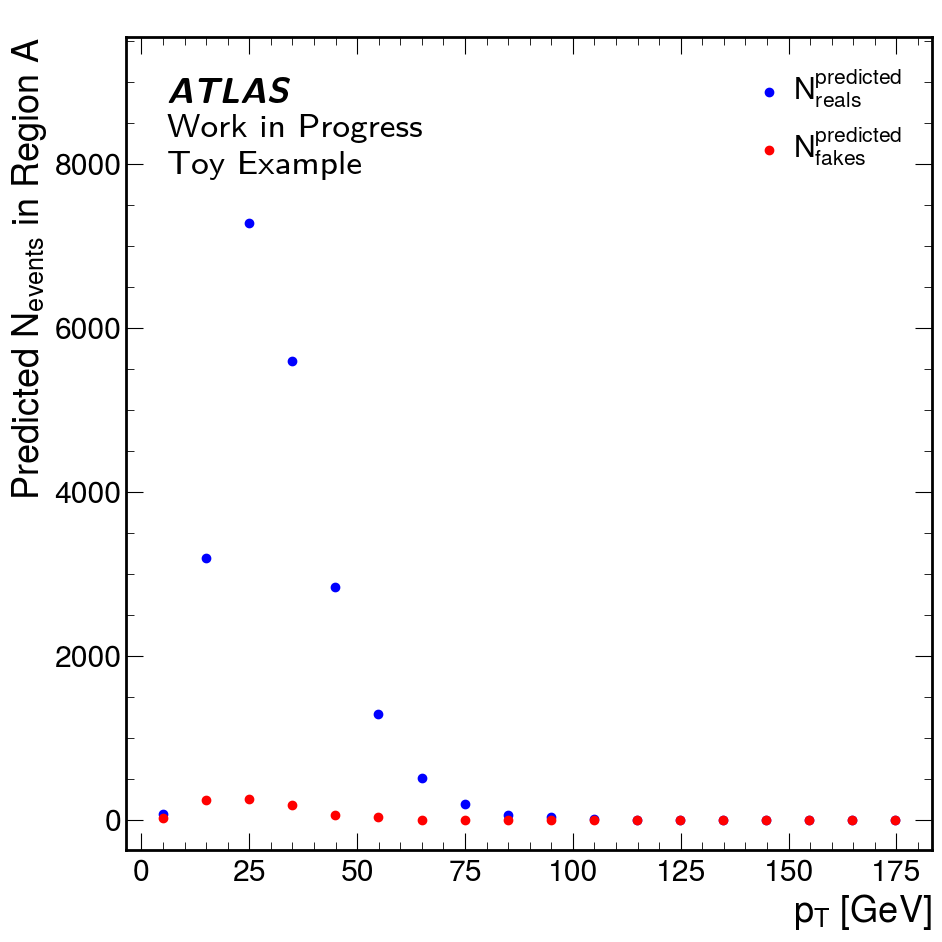

In [28]:
# Predicted real and fake pt distributions using the fake factor

fig, ax = plt.subplots()
ax.scatter(bin_centers, estimated_reals, label= r"$N_{\mathrm{reals}}^{\mathrm{predicted}}$", color= "blue")
ax.scatter(bin_centers, estimated_fakes, label= r"$N_{\mathrm{fakes}}^{\mathrm{predicted}}$", color= "red")
ax.set_xlabel(r"$p_{\mathrm{T}}$ [GeV]")
ax.set_ylabel(r"Predicted $N_{\mathrm{events}}$ in Region A")
bottom, top = ax.get_ylim()
ax.set_ylim(top=top * 1.25)
ax.legend(fancybox=False, facecolor="white", loc="upper right", handlelength=0.75, handletextpad=0.4)
hep.atlas.label(loc=2, ax=ax, data=True, label="Work in Progress\n", rlabel=" ", fontname="Latin Modern sans", fontsize=20)
ax.text(0.05, 0.86, "Toy Example", transform=ax.transAxes, fontsize=24, fontname="Latin Modern Sans", ha="left", va="top")
fig.tight_layout()
plt.show()

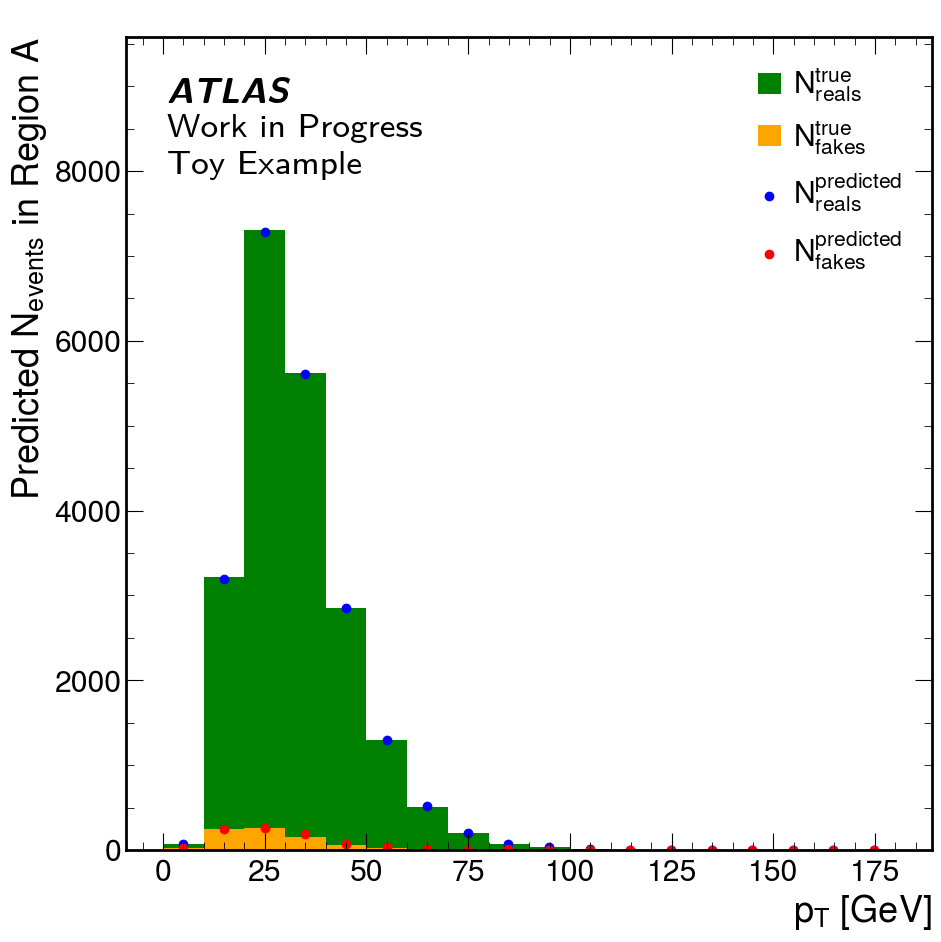

In [29]:
# Comparison between true and predicted distributions

regions = lep_region_def(lep_iso, met_et, met_cut, iso_cut_tight, iso_cut_loose)

fig, ax = plt.subplots()
ax.hist(lep_pt[regions[0] & (is_real == 1)], bins = 18, range = (0, 180), histtype= "stepfilled", label = r"$N_{\mathrm{reals}}^{\mathrm{true}}$", color= "green")
ax.hist(lep_pt[regions[0] & (is_real == 0)], bins = 18, range = (0, 180), histtype= "stepfilled", label = r"$N_{\mathrm{fakes}}^{\mathrm{true}}$", color= "orange")
ax.scatter(bin_centers, estimated_reals, label= r"$N_{\mathrm{reals}}^{\mathrm{predicted}}$", color= "blue")
ax.scatter(bin_centers, estimated_fakes, label= r"$N_{\mathrm{fakes}}^{\mathrm{predicted}}$", color= "red")
ax.set_xlabel(r"$p_{\mathrm{T}}$ [GeV]")
ax.set_ylabel(r"Predicted $N_{\mathrm{events}}$ in Region A")
bottom, top = ax.get_ylim()
ax.set_ylim(top=top * 1.25)
ax.legend(fancybox=False, facecolor="white", loc="upper right", handlelength=0.75, handletextpad=0.4)
hep.atlas.label(loc=2, ax=ax, data=True, label="Work in Progress\n", rlabel=" ", fontname="Latin Modern sans", fontsize=20)
ax.text(0.05, 0.86, "Toy Example", transform=ax.transAxes, fontsize=24, fontname="Latin Modern Sans", ha="left", va="top")
fig.tight_layout()
plt.show()